# Spice Data Reduction
***

### Functions and Constants

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import csv
import math
from scipy.optimize import curve_fit

def get_pol(fr):
    return (fr - 1)/(1 + fr)

def get_scan(number):    #returns the data file scan number in Spice format
    const = 3
    if (number > 999):    #no leading zeros
        zeros = 0
    else:
        if (number == 0):
            zeros = const
        else:
            zeros = const - int(math.floor(math.log10(number)))
    return '0'*zeros + str(number)

default_order = ['detector','time','count rate','nu_pre','nu_post','phase','prism','a_rot',\
                'a_tran','s_rot','s_tran','monitor']
default_dict = {i[1]:i[0] for i in enumerate(default_order)}

def load_data(path, names, dest, write_data=False,overwrite=False,reorder=False):    #data loading function from Spice format
    scan_nums,dates,times,scan_titles,parms,data =[[],[],[],[],[],[]]
    for i in range(len(names)):
        file = open(path + names[i])
        lines = file.readlines()
        lines = [i.replace('\n','') for i in lines]    #removes new line characters
        file.close()
        
        scan_nums.append(lines[0][2::])    #line number determined by Spice format
        scan_nums[i] = scan_nums[i].split(' = ',)[1]
        dates.append(lines[1][2::])
        dates[i] = dates[i].split(' = ',)[1]
        times.append(lines[2][2::])
        times[i] = times[i].split(' = ',)[1]
        scan_titles.append(lines[10][2::])
        scan_titles[i] = scan_titles[i].split(' = ',)[1]
        parms.append(lines[29][7::].split())
        parms[i].append('count rate')
        data.append([j.split()[1::] for j in lines[30::] if (j[0] != '#')])    #assigns the data
        data[i] = [[float(data[i][j][k]) for j in range(len(data[i]))] for k in range(len(data[i][0]))]#HERE'S THE BUG    #converts to float
        data[i] = [list(j) for j in zip(*data[i])]    #transposes table
        
        time_normed_counts = [data[i][j][2]/data[i][j][1] if (data[i][j][1] != 0) else 0 for j in range(len((data[i])))]
        for j in range(len(data[i])):
            data[i][j].append(time_normed_counts[j])
        
        if ((reorder == True) and (parms[i] != default_order)):    #rearranges the columns to default_order
            swap_i = []    #columns to swap
            for j in range(len(parms[i])):
                swap_i.append([j, default_dict[parms[i][j]]])

            swaped_data = [ [0]*len(data[i][0]) for _ in range(len(data[i]))]    #matrix to hold swaped values
            for j in range(len(data[i])):    #slow swapping method, may need some work...
                for k in range(len(data[i][j])):
                    for m in range(len(swap_i)):
                        if (swap_i[m][1] == k):
                            swaped_data[j][k] = data[i][j][m]
                            parms[i][m] = default_order[swap_i[m][0]]    
            data[i] = swaped_data
            
        if (write_data == True):    #writes data to csv files
            if (overwrite == True):
                c_str = 'w'
            else:
                c_str = 'x'    #Fails if the file already exists
            windows_fname = scan_titles[i]    #Cleans the Spice file names for Windows
            invalid = '<>:"/\|?*'
            for char in invalid:
                windows_fname = windows_fname.replace(char,'')
            with open(dest_path + "scan" + str(scan_nums[i]) + "_" + windows_fname + ".csv", c_str, newline='') as csv_file:
                writer = csv.writer(csv_file)
                writer.writerow([scan_titles[i]])
                writer.writerow([dates[i]])
                writer.writerow([times[i]])
                writer.writerow(parms[i])
                for j in range(len(data[i])):
                    writer.writerow(data[i][j])
                    
    #returns the list [scan number, scan date, scan time start, user input scan titles, matrix of data from scan]
    return scan_nums,dates,times,scan_titles,parms,np.array(data)

data_path = "C:/SpICE/User/exp9/Datafiles"
dest_path = "C:/Users/Larmor/Desktop/AER_spice_output"    #WARNING: may overwrite files in destination folder!

### S-bender rotation

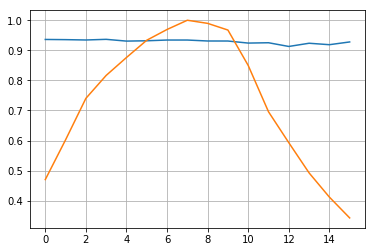

In [63]:
file_range = [19,20]
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)

FR = Data[0][:,0]/Data[1][:,0]
Int = Data[0][:,0]+Data[1][:,0]
Int_max = np.max(Int)
Int = Int/Int_max

plt.plot(get_pol(FR))
plt.plot(Int)
plt.grid()
plt.show()

### Prism FR

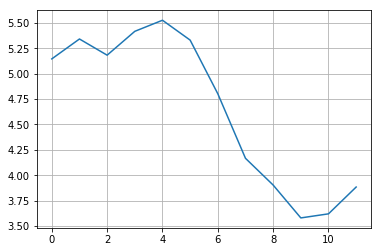

In [65]:
file_range = [21,22]
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)

FR = Data[0][:,0]/Data[1][:,0]
plt.plot(FR)
plt.grid()
plt.show()

Flipping ratio: [49.35555556 45.92848485 28.26419379 16.83064144 11.04806202  7.39566631
  5.2307815   4.15863798  3.61133555  3.32750167]


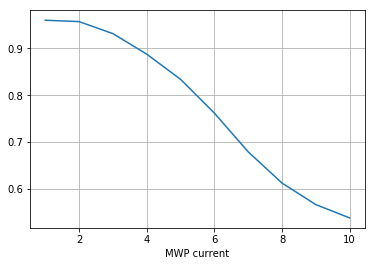

In [87]:
file_range = range(25,35)
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)

FR2 = np.array([Data[i,0,0]/Data[i,1,0] for i in range(10)])
print(f'Flipping ratio: {FR}')
plt.plot(range(1,11),get_pol(FR))
plt.xlabel('MWP current')
plt.grid()
plt.show()

Flipping ratio: [49.35555556 45.92848485 28.26419379 16.83064144 11.04806202  7.39566631
  5.2307815   4.15863798  3.61133555  3.32750167]


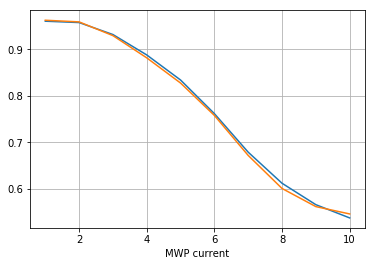

In [88]:
file_range = range(35,45)
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)

FR = np.array([Data[i,0,0]/Data[i,1,0] for i in range(10)])
print(f'Flipping ratio: {FR}')
plt.plot(range(1,11),get_pol(FR))
plt.plot(range(1,11),get_pol(FR2))
plt.xlabel('MWP current')
plt.grid()
plt.show()

### Center guide field pi/2 mode

[amp,freq,phase,shim]=[  0.46423034 184.95942196 148.33668373   0.55579685]
Period: 0.033953393309176454
FR=10.930016179063859
gpa=24.263337525731455


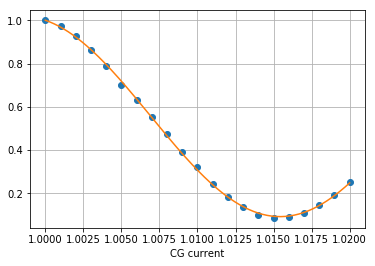

In [2]:
LAMBDA = 5.5e-10
CL = 4.62e14
LENGTH = .3

def my_cos(x,amp,freq,phase,shim):
    return amp*np.cos(x*freq + phase) + shim

file_range = [50]
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)
Data = Data[0,:,0]/np.max(Data[0,:,0])

currents=np.arange(1,1.02,.001)
currents_fine = np.linspace(currents[0],currents[-1],200)
parms,_=curve_fit(my_cos,currents,Data,p0=[.5,.02/6.28,0,.1])#,p0=[.5,0,0,1])
print(f'[amp,freq,phase,shim]={parms}')
print(f'Period: {6.28/parms[1]}')
print(f'FR={np.max(my_cos(currents_fine,*parms))/np.min(my_cos(currents_fine,*parms))}')

print(f'gpa={parms[1]/LAMBDA/CL/LENGTH*1e4}')

plt.plot(currents,Data,'o')
plt.plot(currents_fine,my_cos(currents_fine,*parms))
plt.xlabel('CG current')
plt.grid()
plt.show()

[amp,freq,phase,shim]=[   0.4338042   111.94866988 -112.10928097    0.55866218]
Period: 0.056097138152503605
FR=7.948032675900296
[amp,freq,phase,shim]=[ 2.11196870e-01  1.38668760e+02 -4.88447505e+02  7.83340472e-01]
Period: 0.0452877778353567
FR=1.7382610299823817
gpa 1 amp=22.0284671144412
gpa 4 amps=27.286257398170207


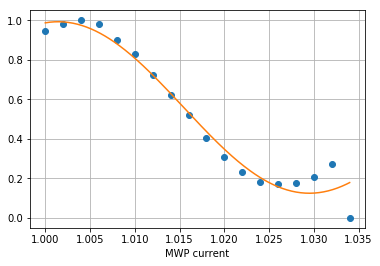

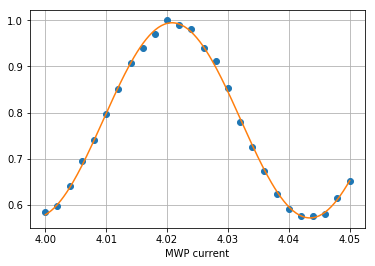

In [3]:
LAMBDA = 5.5e-10
CL = 4.62e14
LENGTH = .2

file_range = [53]
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]
Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)
Data = Data[0,:,0]
Data = Data/np.max(Data)

file_range = [54]
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]
Num,Date,Time,Title,Parms,Data4 = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)
Data4 = Data4[0,:,0]
Data4 = Data4/np.max(Data4)

currents=np.arange(1,1.034,.002)
currents_fine = np.linspace(currents[0],currents[-1],200)
parms,_=curve_fit(my_cos,currents,Data,p0=[.5,.02/6.28,0,.1])#,p0=[.5,0,0,1])
print(f'[amp,freq,phase,shim]={parms}')
print(f'Period: {6.28/parms[1]}')
print(f'FR={np.max(my_cos(currents_fine,*parms))/np.min(my_cos(currents_fine,*parms))}')

currents4=np.arange(4,4.051,.002)
currents_fine4=np.linspace(currents4[0],currents4[-1],200)
parms4,_=curve_fit(my_cos,currents4,Data4,p0=[.1,.04/6.28,0,.1])#,p0=[.5,0,0,1])
print(f'[amp,freq,phase,shim]={parms4}')
print(f'Period: {6.28/parms4[1]}')
print(f'FR={np.max(my_cos(currents_fine4,*parms4))/np.min(my_cos(currents_fine4,*parms4))}')

print(f'gpa 1 amp={parms[1]/LAMBDA/CL/LENGTH*1e4}')
print(f'gpa 4 amps={parms4[1]/LAMBDA/CL/LENGTH*1e4}')

plt.plot(currents,Data,'o')
plt.plot(currents_fine,my_cos(currents_fine,*parms))
plt.xlabel('MWP current')
plt.grid()
plt.show()

plt.plot(currents4,Data4,'o')
plt.plot(currents_fine4,my_cos(currents_fine4,*parms4))
plt.xlabel('MWP current')
plt.grid()
plt.show()

### MWP FR check (5/27)

Flipping ratio: [19.90249433 17.21751969 15.684375   13.21797323 13.70043019 13.38710908
 14.62342569 17.7160804  14.69991618]


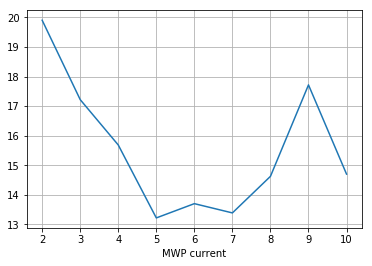

In [140]:
file_range = range(56,65)
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)

FR = np.array([Data[i,0,0]/Data[i,1,0] for i in range(9)])
print(f'Flipping ratio: {FR}')
plt.plot(range(2,11),FR)
plt.xlabel('MWP current')
plt.grid()
plt.show()

### s-bender rotation (5/27) MWP

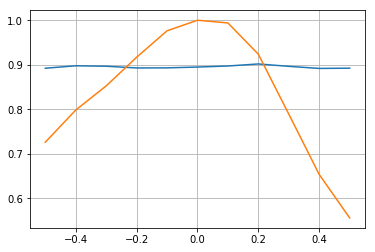

In [154]:
file_range = range(68,79)
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)

FR = Data[:,1,0]/Data[:,0,0]
Int = Data[:,0,0]+Data[:,1,0]
Int_max = np.max(Int)
Int = Int/Int_max

plt.plot(np.linspace(-.5,.5,11),get_pol(FR))
plt.plot(np.linspace(-.5,.5,11),Int)
plt.grid()
plt.show()

### MWP precession mode gpa

In [ ]:
LAMBDA = 5.5e-10
CL = 4.62e14
LENGTH = .2

def my_cos(x,amp,freq,phase,shim):
    return amp*np.cos(x*freq + phase) + shim

file_range = [83]
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)
Data = Data[0,:,0]/np.max(Data[0,:,0])

currents=np.arange(1,1.02,.002)
currents_fine = np.linspace(currents[0],currents[-1],200)
parms,_=curve_fit(my_cos,currents,Data,p0=[.5,.02/6.28,0,.1])#,p0=[.5,0,0,1])
print(f'[amp,freq,phase,shim]={parms}')
print(f'Period: {6.28/parms[1]}')
print(f'FR={np.max(my_cos(currents_fine,*parms))/np.min(my_cos(currents_fine,*parms))}')

print(f'gpa={parms[1]/LAMBDA/CL/LENGTH*1e4}')

plt.plot(currents,Data,'o')
plt.plot(currents_fine,my_cos(currents_fine,*parms))
plt.xlabel('CG current')
plt.grid()
plt.show()

### Phase gpa MWP 3 amps

[amp,freq,phase,shim]=[ 2.25475574e-01  2.09614317e+02 -5.61553158e+02  7.63140769e-01]
Period: 0.029959785681033097
FR=1.6422478549117219
gpa=27.49761466170984


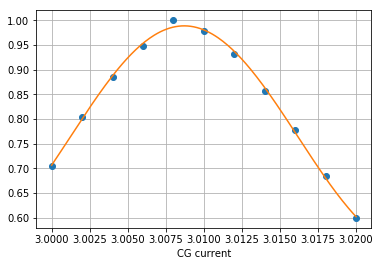

In [156]:
LAMBDA = 5.5e-10
CL = 4.62e14
LENGTH = .3

def my_cos(x,amp,freq,phase,shim):
    return amp*np.cos(x*freq + phase) + shim

file_range = [84]
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)
Data = Data[0,:,0]/np.max(Data[0,:,0])

currents=np.arange(3,3.02,.002)
currents_fine = np.linspace(currents[0],currents[-1],200)
parms,_=curve_fit(my_cos,currents,Data,p0=[.5,.02/6.28,0,.1])#,p0=[.5,0,0,1])
print(f'[amp,freq,phase,shim]={parms}')
print(f'Period: {6.28/parms[1]}')
print(f'FR={np.max(my_cos(currents_fine,*parms))/np.min(my_cos(currents_fine,*parms))}')

print(f'gpa={parms[1]/LAMBDA/CL/LENGTH*1e4}')

plt.plot(currents,Data,'o')
plt.plot(currents_fine,my_cos(currents_fine,*parms))
plt.xlabel('CG current')
plt.grid()
plt.show()

[amp,freq,phase,shim]=[ 3.59110743e-01 -2.09922634e+02  5.57804739e+02  6.50304814e-01]
Period: -0.029915783201532705
FR=3.466453192756826
gpa=-27.538060309323697


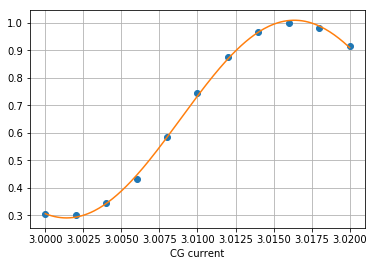

In [159]:
#closer to echo with MWP curret -4.5
LAMBDA = 5.5e-10
CL = 4.62e14
LENGTH = .3

def my_cos(x,amp,freq,phase,shim):
    return amp*np.cos(x*freq + phase) + shim

file_range = [85]
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)
Data = Data[0,:,0]/np.max(Data[0,:,0])

currents=np.arange(3,3.02,.002)
currents_fine = np.linspace(currents[0],currents[-1],200)
parms,_=curve_fit(my_cos,currents,Data,p0=[.1,.02/6.28,0,.5])#,p0=[.5,0,0,1])
print(f'[amp,freq,phase,shim]={parms}')
print(f'Period: {6.28/parms[1]}')
print(f'FR={np.max(my_cos(currents_fine,*parms))/np.min(my_cos(currents_fine,*parms))}')

print(f'gpa={parms[1]/LAMBDA/CL/LENGTH*1e4}')

plt.plot(currents,Data,'o')
plt.plot(currents_fine,my_cos(currents_fine,*parms))
plt.xlabel('CG current')
plt.grid()
plt.show()

[amp,freq,phase,shim]=[17897.78456559  -209.8833126    205.20260233 18428.66745961]
Period: -0.02992138785171045
FR=68.01017344471343
Max:36326.44820008252
Min:534.1325622351615
gpa=-27.532902086203418


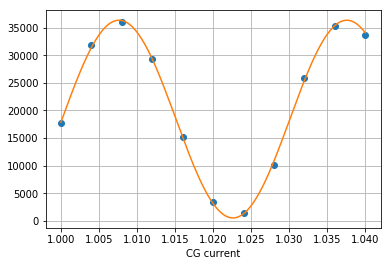

In [164]:
#1 amp closer to echo, after degauss
LAMBDA = 5.5e-10
CL = 4.62e14
LENGTH = .3

def my_cos(x,amp,freq,phase,shim):
    return amp*np.cos(x*freq + phase) + shim

file_range = [87]
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)
Data = Data[0,:,0]

currents=np.arange(1,1.04,.004)
currents_fine = np.linspace(currents[0],currents[-1],200)
parms,_=curve_fit(my_cos,currents,Data,p0=[35000,.02/6.28,0,15000])#,p0=[.5,0,0,1])
print(f'[amp,freq,phase,shim]={parms}')
print(f'Period: {6.28/parms[1]}')
print(f'FR={np.max(my_cos(currents_fine,*parms))/np.min(my_cos(currents_fine,*parms))}')

print(f'Max:{np.max(my_cos(currents_fine,*parms))}')
print(f'Min:{np.min(my_cos(currents_fine,*parms))}')

print(f'gpa={parms[1]/LAMBDA/CL/LENGTH*1e4}')

plt.plot(currents,Data,'o')
plt.plot(currents_fine,my_cos(currents_fine,*parms))
plt.xlabel('CG current')
plt.grid()
plt.show()

[amp,freq,phase,shim]=[-13998.293111     -211.59802044    524.90679077  18713.65118638]
Period: -0.029678916593075772
FR=6.935622007799179
Max:32709.942134742698
Min:4716.22330310966
gpa=-27.757840803281272


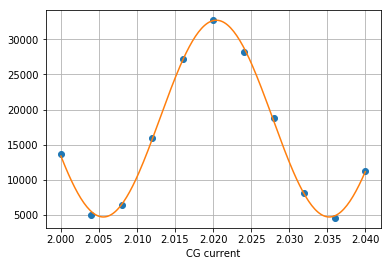

In [165]:
#2 amp closer to echo, after degauss
LAMBDA = 5.5e-10
CL = 4.62e14
LENGTH = .3

def my_cos(x,amp,freq,phase,shim):
    return amp*np.cos(x*freq + phase) + shim

file_range = [88]
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)
Data = Data[0,:,0]

currents=np.arange(2,2.04,.004)
currents_fine = np.linspace(currents[0],currents[-1],200)
parms,_=curve_fit(my_cos,currents,Data,p0=[35000,.02/6.28,0,15000])#,p0=[.5,0,0,1])
print(f'[amp,freq,phase,shim]={parms}')
print(f'Period: {6.28/parms[1]}')
print(f'FR={np.max(my_cos(currents_fine,*parms))/np.min(my_cos(currents_fine,*parms))}')

print(f'Max:{np.max(my_cos(currents_fine,*parms))}')
print(f'Min:{np.min(my_cos(currents_fine,*parms))}')

print(f'gpa={parms[1]/LAMBDA/CL/LENGTH*1e4}')

plt.plot(currents,Data,'o')
plt.plot(currents_fine,my_cos(currents_fine,*parms))
plt.xlabel('CG current')
plt.grid()
plt.show()

### MWP triangle gpa

[amp,freq,phase,shim]=[-14488.55137542    137.00421735    387.87408203  18539.76790456]
Period: 0.04583800500001946
FR=8.149910254982869
Max:33024.71934183613
Min:4052.157423653194
gpa=26.958720454918705


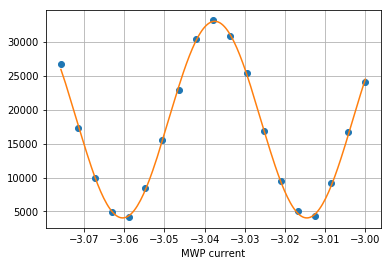

In [188]:
#2 amp closer to echo, after degauss
LAMBDA = 5.5e-10
CL = 4.62e14
LENGTH = .2

def my_cos(x,amp,freq,phase,shim):
    return amp*np.cos(x*freq + phase) + shim

file_range = [89]
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)
Data = Data[0,:,0]
Data = Data[:-1:]

currents=np.linspace(-3.,-3.08,20)
currents = currents[:-1:]

currents_fine = np.linspace(currents[0],currents[-1],200)
parms,_=curve_fit(my_cos,currents,Data,p0=[35000,.02/6.28,0,15000])#,p0=[.5,0,0,1])
print(f'[amp,freq,phase,shim]={parms}')
print(f'Period: {6.28/parms[1]}')
print(f'FR={np.max(my_cos(currents_fine,*parms))/np.min(my_cos(currents_fine,*parms))}')

print(f'Max:{np.max(my_cos(currents_fine,*parms))}')
print(f'Min:{np.min(my_cos(currents_fine,*parms))}')

print(f'gpa={parms[1]/LAMBDA/CL/LENGTH*1e4}')

plt.plot(currents,Data,'o')
plt.plot(currents_fine,my_cos(currents_fine,*parms))
plt.xlabel('MWP current')
plt.grid()
plt.show()

### FR flipping mode long scan

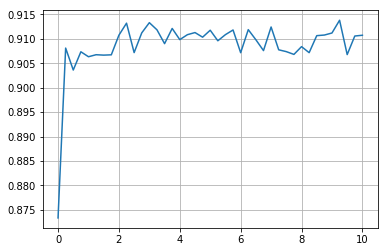

In [203]:
file_range = range(96,137)
file_list = ["/CG-4B_exp0009_scan" + get_scan(i) + ".dat" for i in file_range]

Num,Date,Time,Title,Parms,Data = load_data(data_path,file_list,dest_path,write_data=False,overwrite=False,reorder=True)

currents=np.arange(0,10.1,.25)

FR = Data[:,0,0]/Data[:,1,0]
plt.plot(currents,get_pol(FR))
plt.grid()
plt.show()